In [72]:
from sklearn.model_selection import train_test_split
def split_data(X, y, train_size, val_size, test_size, random_state):
    #testing
    if (train_size + val_size + test_size != 1):
        raise ValueError('train_size, val_size, and test_size don\'t add up to 1')
    if not(isinstance(random_state, int)):
        raise ValueError('random state is not an integer')
    if not(isinstance(X, pd.DataFrame)):
        raise ValueError('X is not a 2D dataframe')
    if not(isinstance(y, pd.Series)):
        raise ValueError('y is not a pandas series')
        
    MAX = 17210 + 20
    NUM_STRAT_BINS = 20
        #bins = #[1].append(np.geomspace(1, MAX, NUM_STRAT_BINS))
    bins = np.geomspace(1, MAX, NUM_STRAT_BINS)
        #bins = np.linspace(1, MAX, NUM_STRAT_BINS)
    y_binned = np.digitize(y, bins)
    a, b = np.unique(y_binned, return_counts=True)

    X_train, X_other, y_train, y_other = train_test_split(X,y,\
                        train_size = train_size,random_state = random_state, stratify=y_binned)
    
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                        train_size = (val_size / (test_size + val_size)),random_state = random_state)

    #do more checks
    if abs(len(df.index) * train_size - len(X_train.index) ) > 1:
        raise ValueError('X_train isnt right length')
    if abs(len(df.index) * train_size - len(y_train.index)) > 1:
        raise ValueError('y_train isnt right length')
    if abs(len(df.index) * val_size - len(X_val.index)) > 1:
        raise ValueError('X_val isnt right length')
    if abs(len(df.index) * val_size - len(y_val.index)) > 1:
        raise ValueError('y_val isnt right length')
    if abs(len(df.index) * test_size - len(X_test.index)) > 1:
        raise ValueError('X_test isnt right length')
    if abs(len(df.index) * test_size - len(y_test.index)) > 1:
        raise ValueError('y_test isnt right length')

    return (X_train, y_train, X_val, y_val, X_test, y_test)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/final.csv', dtype={'citizen': 'string', 'sex': 'string', 'age': 'string', 'decision': 'string', 'geo': 'string', 'TIME_PERIOD': 'string', 'GENCONV': "Int64", 'HUMSTAT': "Int64", 'SUB_PROT': "Int64", 'REJECTED': "Int64", 'TOTAL_APPS': "Int64", "POS_RATE": "Float64"}, keep_default_na=False, na_values=['nan'])
df

,citizen,sex,age,geo,TIME_PERIOD,GENCONV,HUMSTAT,SUB_PROT,REJECTED,TOTAL_POS,TOTAL_APPS,POS_RATE
0,AD,F,UNK,AT,2008-Q1,0,0,0,0,0,0,<NA>
1,AD,F,UNK,AT,2008-Q2,0,0,0,0,0,0,<NA>
2,AD,F,UNK,AT,2008-Q3,0,0,0,0,0,0,<NA>
3,AD,F,UNK,AT,2008-Q4,0,0,0,0,0,0,<NA>
4,AD,F,UNK,AT,2009-Q1,0,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
7221109,ZW,UNK,Y_LT14,UK,2019-Q3,0,0,0,0,0,0,<NA>
7221110,ZW,UNK,Y_LT14,UK,2019-Q4,0,0,0,0,0,0,<NA>
7221111,ZW,UNK,Y_LT14,UK,2020-Q1,0,0,0,0,0,0,<NA>
7221112,ZW,UNK,Y_LT14,UK,2020-Q2,0,0,0,0,0,0,<NA>


In [73]:
df = df[df["REJECTED"].notna()]

In [6]:
y = df["REJECTED"]
X = df.drop(['GENCONV', 'HUMSTAT', 'SUB_PROT', 'REJECTED', 'TOTAL_POS', 'POS_RATE'], axis=1)
RANDOM_STATE = 14

In [74]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, 0.6, 0.2, 0.2, RANDOM_STATE)

In [77]:
X_train

,citizen,sex,age,geo,TIME_PERIOD,TOTAL_APPS
3812586,LY,F,Y18-34,MT,2011-Q2,0
3982589,ME,UNK,Y_GE65,ME,2022-Q1,0
5359784,RU,M,Y_LT14,FI,2019-Q3,25
2694593,HU,UNK,Y14-17,CY,2013-Q3,0
1770258,DZ,UNK,Y14-17,IS,2022-Q1,0
...,...,...,...,...,...,...
3989600,MG,F,Y18-34,DK,2016-Q3,0
4775136,NZ,F,Y35-64,LT,2013-Q1,0
5459081,SB,M,Y14-17,LT,2011-Q2,0
1784280,EC,F,Y18-34,LT,2021-Q2,0


In [1]:
#****************************************************preprocessing****************************************************

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

times = []
for i in range(2008, 2024):
    times.append(str(i) + "-Q1")
    times.append(str(i) + "-Q2")
    times.append(str(i) + "-Q3")
    times.append(str(i) + "-Q4")

ordinal_ftrs = ['age', 'TIME_PERIOD']
ordinal_cats = [['UNK','Y_LT14','Y14-17','Y18-34','Y35-64','Y_GE65'], times]
onehot_ftrs = ['citizen', 'geo', 'sex']
minmax_ftrs = []
std_ftrs = []

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

NameError: name 'X_train' is not defined

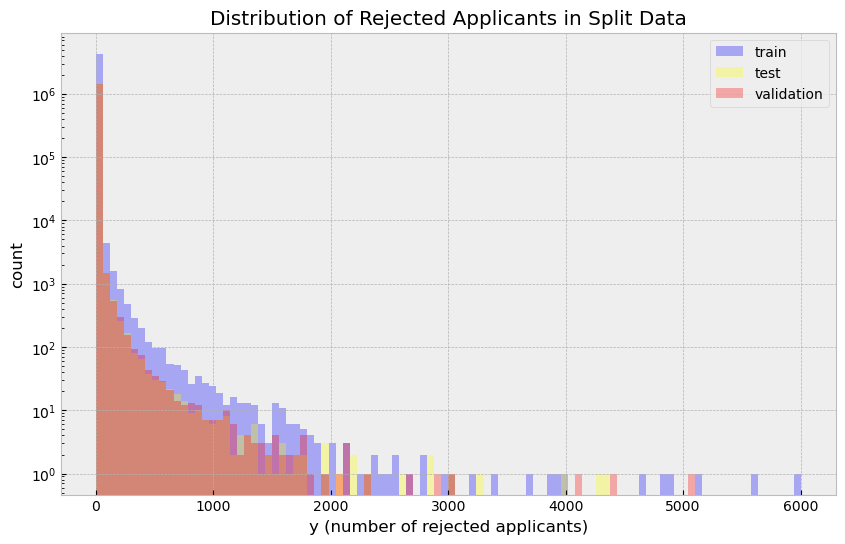

In [122]:
from matplotlib import pylab as plt

plt.style.use("bmh")
plt.figure(figsize=(10,6))
bin_range = (0,6000)
plt.hist(y_train,alpha=0.3,bins=100,range=bin_range,color="blue",label="train")
plt.hist(y_test,alpha=0.3,bins=100,range=bin_range,color="yellow",label="test")
plt.hist(y_val,alpha=0.3,bins=100,range=bin_range,color="red",label="validation")

plt.legend()
plt.ylabel('count')
plt.xlabel('y (number of rejected applicants)')
plt.title("Distribution of Rejected Applicants in Split Data")
plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
plt.show()

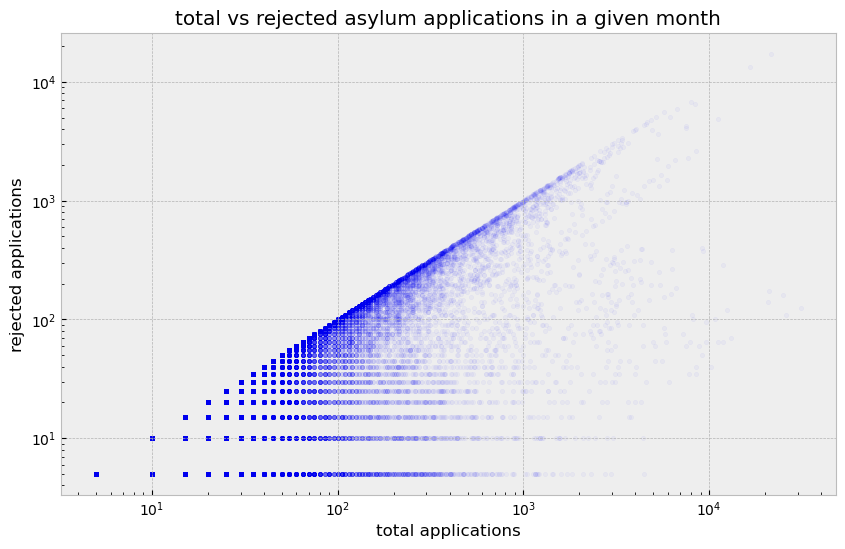

In [123]:
df.plot.scatter('TOTAL_APPS','REJECTED',figsize=(10,6),alpha=0.03,s=10) # alpha=0.1,s=10
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('total applications')
plt.ylabel('rejected applications')
plt.title("total vs rejected asylum applications in a given month")
plt.show()

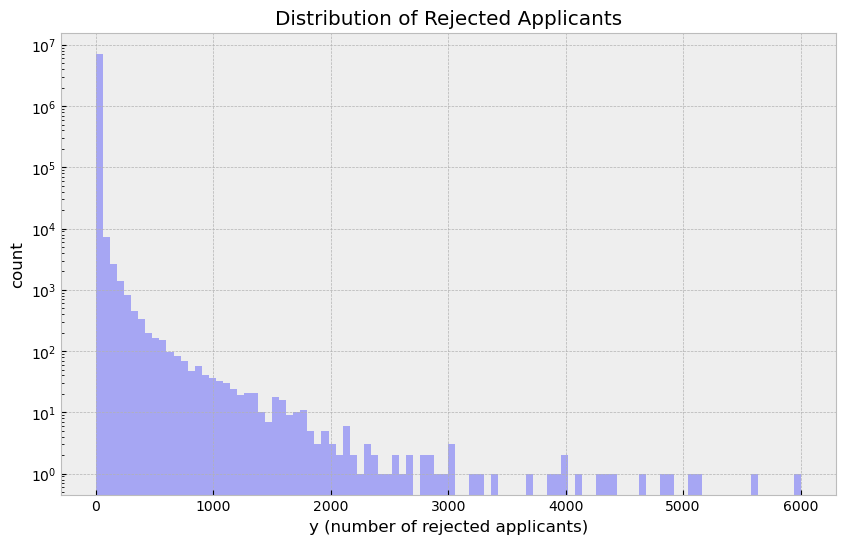

In [124]:
from matplotlib import pylab as plt

plt.style.use("bmh")
plt.figure(figsize=(10,6))
bin_range = (0,6000)
plt.hist(y,alpha=0.3,bins=100,range=bin_range,color="blue",label="train")

plt.ylabel('count')
plt.xlabel('y (number of rejected applicants)')
plt.title("Distribution of Rejected Applicants")
plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
plt.show()

In [125]:
X_val

,citizen,sex,age,geo,TIME_PERIOD,TOTAL_APPS
3643659,LR,M,Y14-17,DE,2022-Q3,0
3881440,MC,F,Y14-17,IT,2009-Q1,0
5243229,RNC,M,UNK,FR,2017-Q2,<NA>
4410333,MX,UNK,Y_LT14,BE,2022-Q3,<NA>
7016732,WS,F,Y_GE65,LT,2020-Q2,0
...,...,...,...,...,...,...
92158,AF,M,Y_GE65,LT,2022-Q2,0
393229,BA,F,UNK,SI,2009-Q2,<NA>
6235349,TL,F,Y_LT14,FI,2017-Q2,0
3955054,ME,F,Y18-34,NO,2011-Q1,0


In [126]:
X_train_prep

array([[ 3., 13.,  0., ...,  1.,  0.,  0.],
       [ 5., 56.,  0., ...,  0.,  0.,  1.],
       [ 1., 46.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 2., 13.,  0., ...,  0.,  1.,  0.],
       [ 3., 53.,  0., ...,  1.,  0.,  0.],
       [ 2., 19.,  0., ...,  0.,  1.,  0.]])

In [128]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(X_train_prep)

KeyboardInterrupt: 

In [129]:
X_train_prep

KeyboardInterrupt: 

In [ ]:
X_train_prep